In [1]:
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import sqlite3

In [2]:
# Common vars
test_base_dir = '/mnt/test/pyscipio'
filter_job_dir = 'job_target_arabid_*_query_arabid_thaliana'
filter_result_dir = 'run__q_genes*'
csv_basename = 'prefilter_scipio_results'

In [3]:
# Collect CSV files
# path = os.path.join(test_base_dir, filter_job_dir, '**/%s.csv' % csv_basename)
path = os.path.join(test_base_dir, filter_job_dir, filter_result_dir, '%s.csv' % csv_basename)
f_list = sorted(glob.glob(path))
[print(f) for f in f_list]
print(len(f_list))

/mnt/test/pyscipio/job_target_arabid_job_ADBK01000000_query_arabid_thaliana/run__q_genes__fungi_default__1618663072/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_arabid_job_AFNB01000000_query_arabid_thaliana/run__q_genes__fungi_default__1618584322/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_arabid_job_BASP01000000_query_arabid_thaliana/run__q_genes__fungi_default__1618702656/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_arabid_job_CACSHJ010000000_query_arabid_thaliana/run__q_genes__fungi_default__1618584322/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_arabid_job_CADHRU010000000_query_arabid_thaliana/run__q_genes__fungi_default__1618584322/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_arabid_job_CAEFZF010000000_query_arabid_thaliana/run__q_genes__fungi_default__1618584322/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_arabid_job_FJVB01000000_query_arabid_thaliana/run__q_genes__fungi_default__1618584322/prefi

In [4]:
# Reduce results to latest run
latest_f_list = {}
for f in sorted(f_list):
    r = os.path.dirname(f)
    j = os.path.split(r)
    latest_f_list[j[0]] = f
# Control
for f in latest_f_list.values():
    print(f)
f_list = list(latest_f_list.values())
print(len(f_list))

/mnt/test/pyscipio/job_target_arabid_job_ADBK01000000_query_arabid_thaliana/run__q_genes__fungi_default__1618663072/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_arabid_job_AFNB01000000_query_arabid_thaliana/run__q_genes__fungi_default__1618584322/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_arabid_job_BASP01000000_query_arabid_thaliana/run__q_genes__fungi_default__1618702656/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_arabid_job_CACSHJ010000000_query_arabid_thaliana/run__q_genes__fungi_default__1618584322/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_arabid_job_CADHRU010000000_query_arabid_thaliana/run__q_genes__fungi_default__1618584322/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_arabid_job_CAEFZF010000000_query_arabid_thaliana/run__q_genes__fungi_default__1618584322/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_arabid_job_FJVB01000000_query_arabid_thaliana/run__q_genes__fungi_default__1618584322/prefi

In [5]:
from goenomics.util.dir import makedirs

# Generate SQLite
# print(os.getcwd())
user_dir = '/home/jovyan/store'
result_path = os.path.join(user_dir, 'benchmark')
makedirs(result_path)
sqlite_file = os.path.join(result_path, csv_basename + '.sqlite')

# Detect number of genes
m = re.search('.+run__(.+)__[a-z].+', f_list[0])
q_genes_dir = m.group(1)
job_base_dir = os.path.dirname(os.path.dirname(f_list[0]))
num_genes = len(os.listdir(os.path.join(job_base_dir, q_genes_dir)))

In [9]:
# Remove old sqlite db
os.remove(sqlite_file)

# Create a new database file:
db = sqlite3.connect(sqlite_file)
# Import CSVs
for csv_file in f_list:
    print('Append "%s" to SQlite database' % csv_file)
    # Load the CSV in chunks:
    for c in pd.read_csv(csv_file, delimiter=' ', quotechar='|', chunksize=1000):
        # Append all rows to a (new) database table with name 'genes':
        # c.to_sql('genes', db, if_exists='replace')
        c.to_sql('genes', db, if_exists='append')
# Close connection
db.close()

Append "/mnt/test/pyscipio/job_target_arabid_job_ADBK01000000_query_arabid_thaliana/run__q_genes__fungi_default__1618663072/prefilter_scipio_results.csv" to SQlite database
Append "/mnt/test/pyscipio/job_target_arabid_job_AFNB01000000_query_arabid_thaliana/run__q_genes__fungi_default__1618584322/prefilter_scipio_results.csv" to SQlite database
Append "/mnt/test/pyscipio/job_target_arabid_job_BASP01000000_query_arabid_thaliana/run__q_genes__fungi_default__1618702656/prefilter_scipio_results.csv" to SQlite database
Append "/mnt/test/pyscipio/job_target_arabid_job_CACSHJ010000000_query_arabid_thaliana/run__q_genes__fungi_default__1618584322/prefilter_scipio_results.csv" to SQlite database
Append "/mnt/test/pyscipio/job_target_arabid_job_CADHRU010000000_query_arabid_thaliana/run__q_genes__fungi_default__1618584322/prefilter_scipio_results.csv" to SQlite database
Append "/mnt/test/pyscipio/job_target_arabid_job_CAEFZF010000000_query_arabid_thaliana/run__q_genes__fungi_default__1618584322/pr

In [10]:
# CSV: File format (header)
fieldnames = ['job',
              'gene_nr',
              'hit_nr',
              'target',
              'is_complete',
              'start_codon',
              'stop_codon',
              'score',
              'dna_start',
              'dna_end',
              'contigs']
# Connect to database:
conn = sqlite3.connect(sqlite_file)
## Test: Connection 
SQL_Query = pd.read_sql_query('''select * from genes LIMIT 10''', conn)
df = pd.DataFrame(SQL_Query, columns=fieldnames)
# Control
df

job  gene_nr  hit_nr  \
0  job_target_arabid_job_ADBK01000000_query_arabi...    23280       0   
1  job_target_arabid_job_ADBK01000000_query_arabi...    23280       1   
2  job_target_arabid_job_ADBK01000000_query_arabi...    23280       5   
3  job_target_arabid_job_ADBK01000000_query_arabi...    23280       3   
4  job_target_arabid_job_ADBK01000000_query_arabi...    23280       4   
5  job_target_arabid_job_ADBK01000000_query_arabi...    23280       2   
6  job_target_arabid_job_ADBK01000000_query_arabi...    37511       4   
7  job_target_arabid_job_ADBK01000000_query_arabi...    37511      16   
8  job_target_arabid_job_ADBK01000000_query_arabi...    37511       1   
9  job_target_arabid_job_ADBK01000000_query_arabi...    37511      13   

         target  is_complete start_codon stop_codon  score  dna_start  \
0  ADBK01000925            0         atg       None  0.950      45108   
1  ADBK01001160            1         atg        tag  1.000      68257   
2  ADBK01001158            0         atg        taa  0.956       9889   
3  ADBK01001856            0        None        taa  0.854       1285   
4  ADBK01003577            0        None        taa  0.854        601   
5  ADBK01001160            1         atg        tga  1.000     146016   
6  ADBK01001896            0        None        tga  0.692      15663   
7  ADBK01000498            0         atg       None  0.950     196157   
8  ADBK01000266            0        None        tga  0.736     358649   
9  ADBK01000181            0        None       None  0.733     184256   

   dna_end  contigs  
0    44033        1  
1    69305        1  
2    13980        1  
3      994        1  
4      892        1  
5   145539        1  
6    15159        1  
7   195668        1  
8   359281        1  
9   184739        1

In [11]:
## Number of jobs
# SQL_Query = pd.read_sql_query('''select DISTINCT(job) as job from genes''', conn)
# df = pd.DataFrame(SQL_Query, columns=['job'])
## All Complete genes by genes per job
# SQL_Query = pd.read_sql_query('''select job, COUNT(job) as cnt from genes WHERE is_complete = True GROUP BY job''', conn)
# df = pd.DataFrame(SQL_Query, columns=['job', 'cnt'])
## Complete genes by genes per job (first hit only)
SQL_Query = pd.read_sql_query('''select job, COUNT(job) as cnt from genes WHERE hit_nr = 0 and is_complete = True GROUP BY job''', conn)
df = pd.DataFrame(SQL_Query, columns=['job', 'cnt'])

# Control
df

job    cnt
0   job_target_arabid_job_ADBK01000000_query_arabi...  21704
1   job_target_arabid_job_AFNB01000000_query_arabi...  27331
2   job_target_arabid_job_BASP01000000_query_arabi...  20064
3   job_target_arabid_job_CACSHJ010000000_query_ar...  30201
4   job_target_arabid_job_CADHRU010000000_query_ar...  12918
5   job_target_arabid_job_CAEFZF010000000_query_ar...  29654
6   job_target_arabid_job_FJVB01000000_query_arabi...  21489
7   job_target_arabid_job_JSAD01000000_query_arabi...  28583
8   job_target_arabid_job_LUHQ01000000_query_arabi...  30054
9   job_target_arabid_job_LXSY01000000_query_arabi...  30576
10  job_target_arabid_job_OANL01000000_query_arabi...  21265
11  job_target_arabid_job_OFEF01000000_query_arabi...  32159
12  job_target_arabid_job_OMOL01000000_query_arabi...  29811
13  job_target_arabid_job_RCNM01000000_query_arabi...  18361

In [12]:
from argparse import Namespace

genome_stats_tmpl = {'job': '', 'genes': 0, 'predictions': 0, 'complete': 0, 'incomplete': 0, 'missing': 0, 'alt_complete': 0, 'alt_incomplete': 0, 'complete_1t': 0, 'complete_nt': 0, 'incomplete_1t': 0, 'incomplete_nt': 0}
genome_stats = Namespace(**genome_stats_tmpl)
stats_tmpl = {'job': [], 'genes': [], 'predictions': [], 'complete': [], 'incomplete': [], 'missing': [], 'alt_complete': [], 'alt_incomplete': [], 'complete_1t': [], 'complete_nt': [], 'incomplete_1t': [], 'incomplete_nt': []}
stats = Namespace(**stats_tmpl)

SQL_Query = pd.read_sql_query('''select DISTINCT(job) as job from genes ORDER BY job ASC''', conn)
df = pd.DataFrame(SQL_Query, columns=['job'])
print('Append "%s" to SQlite database' % csv_file)
for i, job in enumerate(df.job):
    m = re.search('.+_([A-Z]{2,6}[0-9]{6,11})_.+', job)
    short_job = m.group(1) if m else job
    stats.job.append(short_job)
    ## Total number of genes
    genome_stats.genes = num_genes
    stats.genes.append(num_genes)
    ## Stats: All predictions
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' ''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    genome_stats.predictions = df.cnt[0]
    stats.predictions.append(df.cnt[0])
    ## Stats: Complete genes
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and hit_nr = 0 and is_complete = True''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    genome_stats.complete = df.cnt[0]
    stats.complete.append(df.cnt[0])
    ## Stats: InComplete genes
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and hit_nr = 0 and is_complete = False''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    genome_stats.incomplete = df.cnt[0]
    stats.incomplete.append(df.cnt[0])
    ## Stats: Missing genes
    stats.missing.append(genome_stats.genes - genome_stats.complete - genome_stats.incomplete)
    ## Stats: Alternative Complete genes
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and hit_nr > 0 and is_complete = True''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    stats.alt_complete.append(df.cnt[0])
    ## Stats: Alternative InComplete genes
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and hit_nr > 0 and is_complete = False''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    stats.alt_incomplete.append(df.cnt[0])
    ## Stats: Complete genes (1 target)
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and is_complete = True and contigs = 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    stats.complete_1t.append(df.cnt[0])
    ## Stats: InComplete genes (1 target)
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and is_complete = False and contigs = 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    stats.incomplete_1t.append(df.cnt[0])
    ## Stats: Complete genes (multiple targets)
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and is_complete = True and contigs > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    stats.complete_nt.append(df.cnt[0])
    ## Stats: InComplete genes (multiple targets)
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and is_complete = False and contigs > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    stats.incomplete_nt.append(df.cnt[0])

# Convert to DataFrame
pd_stats = pd.DataFrame.from_dict(dict(vars(stats)))
# Control
pd_stats

job  genes  predictions  complete  incomplete  missing  \
0      ADBK01000000  48321      2088755     21704       25418     1199   
1      AFNB01000000  48321      1527497     27331       19744     1246   
2      BASP01000000  48321      1841851     20064       27214     1043   
3   CACSHJ010000000  48321      1820211     30201       17648      472   
4   CADHRU010000000  48321      1945707     12918       33964     1439   
5   CAEFZF010000000  48321      1816068     29654       18206      461   
6      FJVB01000000  48321      2066735     21489       25584     1248   
7      JSAD01000000  48321      1797446     28583       19297      441   
8      LUHQ01000000  48321      1798599     30054       17750      517   
9      LXSY01000000  48321      1806675     30576       17184      561   
10     OANL01000000  48321      1982985     21265       25748     1308   
11     OFEF01000000  48321      1801021     32159       15774      388   
12     OMOL01000000  48321      1791707     29811       18065      445   
13     RCNM01000000  48321      1816621     18361       28817     1143   

    alt_complete  alt_incomplete  complete_1t  complete_nt  incomplete_1t  \
0         391559         1650074       411953         1310        1585436   
1         203007         1277415       220782         9556         869624   
2         250201         1544372       261299         8966        1086632   
3         356638         1415724       386837            2        1432035   
4         195871         1702954       187527        21262         930042   
5         354943         1413265       384594            3        1430480   
6         396071         1623591       417132          428        1624450   
7         342307         1407259       370877           13        1425552   
8         350305         1400490       380359            0        1418008   
9         332439         1426476       361362         1653        1339499   
10        380346         1555626       401338          273        1564590   
11        352233         1400855       384392            0        1416465   
12        344678         1399153       374489            0        1417126   
13        277470         1491973       291209         4622        1220836   

    incomplete_nt  
0           90056  
1          427535  
2          484954  
3            1337  
4          806876  
5             991  
6           24725  
7            1004  
8             232  
9          104161  
10          16784  
11            164  
12             92  
13         299954

In [13]:
job = 'job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae'
job = 'job_target_arabid_job_ADBK01000000_query_arabid_thaliana'

## Stats: Duplicate complete genes
SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True GROUP BY target, dna_start, dna_end HAVING COUNT(*) > 1''' % job, conn)
df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
print("Identical genes")
print(sum(df.cnt))
SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True GROUP BY target, dna_start HAVING COUNT(*) > 1''' % job, conn)
df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
print("Genes with same dna_start")
print(sum(df.cnt))
SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True GROUP BY target, dna_end HAVING COUNT(*) > 1''' % job, conn)
df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
print("Genes with same dna_end")
print(sum(df.cnt))


Identical genes
380947
Genes with same dna_start
391022
Genes with same dna_end
395146


In [ ]:
job = 'job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae'
job = 'job_target_arabid_job_ADBK01000000_query_arabid_thaliana'

## Stats: Duplicate complete genes
#SELECT COUNT(*) FROM (
#  SELECT DISTINCT target, dna_start, dna_end FROM (
#    select g1.* from (SELECT * FROM genes WHERE job = 'job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae' and is_complete = True) g1 
#    inner join (SELECT * FROM genes WHERE job = 'job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae' and is_complete = True) g2
#    on g2.target = g1.target and 
#        (g2.dna_start >= g1.dna_start and g2.dna_start <= g1.dna_end) or
#        (g2.dna_end >= g1.dna_start and g2.dna_end <= g1.dna_end)
#) q
#);
SQL_Query = pd.read_sql_query('''SELECT DISTINCT target, dna_start, dna_end FROM (
select g1.* from (SELECT * FROM genes WHERE job = '%s' and is_complete = True) g1 
inner join (SELECT * FROM genes WHERE job = '%s' and is_complete = True) g2
on g2.target = g1.target and 
(g2.dna_start >= g1.dna_start and g2.dna_start <= g1.dna_end) or
(g2.dna_end >= g1.dna_start and g2.dna_end <= g1.dna_end)
)''' % (job, job), conn)
df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end'])
df

In [12]:
stats_tmpl = {'job': [], 'indentical_genes': [], 'genes_same_start': [], 'genes_same_end': [], 'genes_overlapping': []}
stats = Namespace(**stats_tmpl)

## Stats: Duplicate complete genes
SQL_Query = pd.read_sql_query('''select DISTINCT(job) as job from genes ORDER BY job ASC''', conn)
df = pd.DataFrame(SQL_Query, columns=['job'])
for i, job in enumerate(df.job):
    m = re.search('.+_([A-Z]{2,6}[0-9]{6,11})_.+', job)
    short_job = m.group(1) if m else job
    stats.job.append(short_job)
    ## Get numbers
    SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True GROUP BY target, dna_start, dna_end HAVING COUNT(*) > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
    stats.indentical_genes.append(sum(df.cnt))
    SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True GROUP BY target, dna_start HAVING COUNT(*) > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
    stats.genes_same_start.append(sum(df.cnt))
    SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True GROUP BY target, dna_end HAVING COUNT(*) > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
    stats.genes_same_end.append(sum(df.cnt))
    SQL_Query = pd.read_sql_query('''SELECT DISTINCT target, dna_start, dna_end FROM (
    select g1.* from (SELECT * FROM genes WHERE job = '%s' and is_complete = True) g1 
    inner join (SELECT * FROM genes WHERE job = '%s' and is_complete = True) g2
    on g2.target = g1.target and (g2.dna_start >= g1.dna_start and g2.dna_start <= g1.dna_end) or (g2.dna_end >= g1.dna_start and g2.dna_end <= g1.dna_end)
    )''' % (job, job), conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end'])
    stats.genes_overlapping.append(len(df))

# Convert to DataFrame
pd_stats = pd.DataFrame.from_dict(dict(vars(stats)))
# Control
pd_stats

job  indentical_genes  genes_same_start  genes_same_end  \
0      AACU03000000              9280             10156           11124   
1      ADBL01000000              1863              2055            2303   
2      ANOW01000000              2870              3187            3667   
3      AXDJ01000000              3947              4458            5183   
4      AZSW01000000              3484              3910            4565   
5   JAATWF010000000             10741             11717           12656   
6   JAATWG010000000             10306             11264           12196   
7   JAAXMU010000000              4232              4751            5503   
8          JH165220               203               214             219   
9      JMQU01000000              2873              3300            3867   
10     LNTO01000000              4195              4730            5493   
11     LOFB01000000              4582              5054            5767   
12     LXOQ01000000              5468              5992            7042   
13     MQOP01000000              9878             10752           11741   
14     MQOR01000000              4688              5204            6172   
15     MQRB01000000              4626              5145            6118   
16     NKQG01000000              4697              5229            6164   
17     PJYT01000000              4425              4897            5631   
18     PJZD01000000              4986              5535            6406   
19     PQBJ01000000              4692              5069            5746   
20     PYSQ01000000              2745              2951            3386   
21     RRCK01000000              5661              6171            6993   
22     VCMT01000000              4590              5147            6056   

    genes_overlapping  
0                7192  
1                1550  
2                3291  
3                5627  
4                5111  
5                7576  
6                7433  
7                5374  
8                  96  
9                4956  
10               5602  
11               4437  
12               6036  
13               7176  
14               6117  
15               5969  
16               5882  
17               4514  
18               5855  
19               4087  
20               1883  
21               4696  
22               5756

In [19]:
## Check: Score < 1.0 and complete gene
SQL_Query = pd.read_sql_query('''select COUNT(*) from genes WHERE score < 1.0 and is_complete = True''', conn)
df = pd.DataFrame(SQL_Query)
# Control
df
## Check: Score == 1.0 and complete gene
SQL_Query = pd.read_sql_query('''select COUNT(*) from genes WHERE score = 1.0 and is_complete = True''', conn)
df = pd.DataFrame(SQL_Query)
# Control
df

COUNT(*)
0    319128

In [20]:
## All genes by gene number 
# SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes GROUP BY gene_nr''', conn)
# df = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])

## Incomplete genes by gene number 
# SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE is_complete = False GROUP BY gene_nr''', conn)
# df = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])

## Complete genes by gene number 
# SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE is_complete = True GROUP BY gene_nr''', conn)
# df = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])

## Complete genes by gene number (first hit only)
SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE hit_nr = 0 and is_complete = True GROUP BY gene_nr ORDER BY cnt, gene_nr ASC''', conn)
df = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])

## 
# SQL_Query = pd.read_sql_query('''
# SELECT SubQ.cnt as assembly_nr, COUNT(SubQ.cnt) as cnt FROM
# (select gene_nr, COUNT(gene_nr) as cnt from genes WHERE hit_nr = 0 and is_complete = True GROUP BY gene_nr ORDER BY cnt, gene_nr ASC) as SubQ
# GROUP BY SubQ.cnt
# ''', conn)
# df = pd.DataFrame(SQL_Query, columns=['assembly_nr', 'cnt'])

# Control
df

gene_nr  cnt
0          189    1
1          244    1
2          283    1
3          305    1
4          307    1
...        ...  ...
11471     5785   23
11472     9835   23
11473    10345   23
11474    11007   23
11475    12600   23

[11476 rows x 2 columns]

array([[<AxesSubplot:xlabel='gene_nr', ylabel='gene_nr'>,
        <AxesSubplot:xlabel='cnt', ylabel='gene_nr'>],
       [<AxesSubplot:xlabel='gene_nr', ylabel='cnt'>,
        <AxesSubplot:xlabel='cnt', ylabel='cnt'>]], dtype=object)

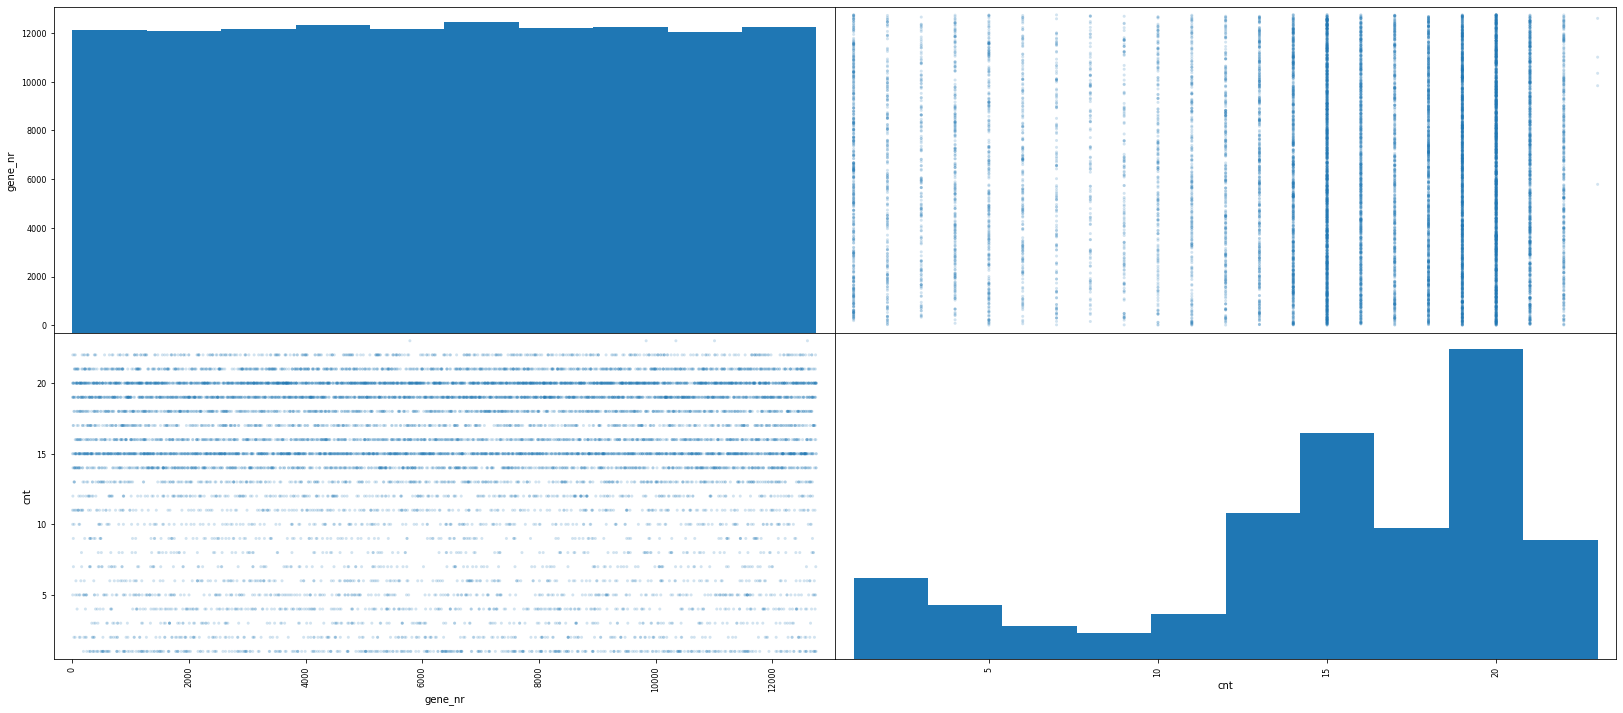

In [21]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(28.0,12.0))

In [22]:
## Gene numbers without ANY gene predictions
SQL_Query = pd.read_sql_query('''select DISTINCT(gene_nr) from genes ORDER BY gene_nr''', conn)
df = pd.DataFrame(SQL_Query, columns=['gene_nr',])
# Control
# print(df)
all_genes = range(0,12755)
missing_genes = sorted(set(all_genes) - set(df.gene_nr))
len(missing_genes)

42

In [23]:
## Gene numbers without COMPLETE gene predictions
SQL_Query = pd.read_sql_query('''select DISTINCT(gene_nr) from genes WHERE is_complete = True ORDER BY gene_nr''', conn)
df = pd.DataFrame(SQL_Query, columns=['gene_nr',])
# Control
# print(df)
all_genes = range(0,num_genes)
missing_genes = sorted(set(all_genes) - set(df.gene_nr))
len(missing_genes)

1023

<AxesSubplot:xlabel='gene_nr'>

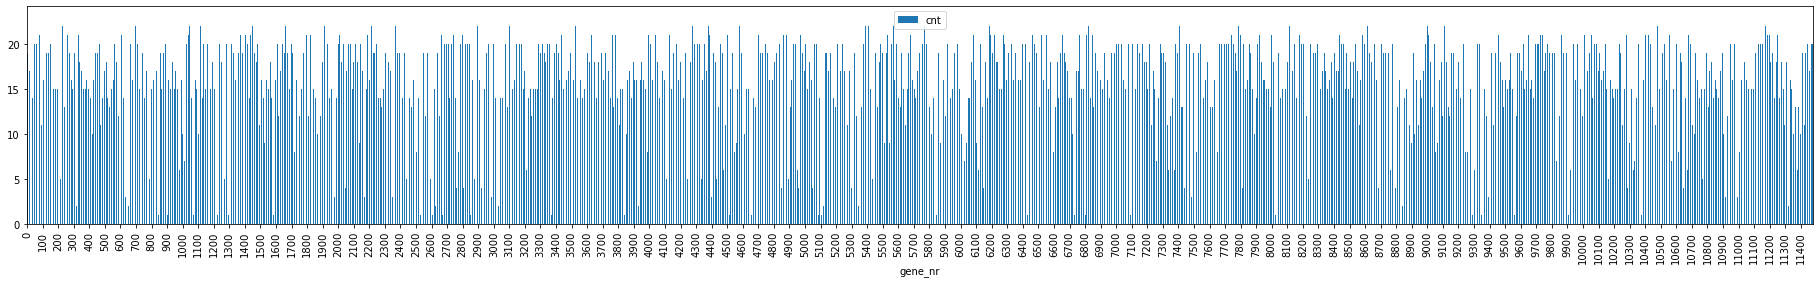

In [24]:
## Complete genes by gene number (first hit only)
SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE hit_nr = 0 and is_complete = True GROUP BY gene_nr ORDER BY gene_nr ASC''', conn)
df = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])
df.plot.bar(x='gene_nr', y='cnt', xticks=range(0,len(df),100), figsize=(32.0,4.0))

In [25]:
## Job: job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae
SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE job = 'job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae' GROUP BY gene_nr ORDER BY gene_nr ASC''', conn)
# SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE job = 'job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae' and is_complete = True GROUP BY gene_nr ORDER BY gene_nr ASC''', conn)
# SQL_Query = pd.read_sql_query('''select gene_nr, 1 as cnt from genes WHERE job = 'job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae' and is_complete = True GROUP BY gene_nr ORDER BY gene_nr ASC''', conn)
df_sql = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])
df_job = pd.DataFrame.from_dict(dict([('gene_nr', range(0, num_genes)), ('cnt', np.zeros(num_genes, dtype=int))]))
df_job.cnt[df_sql.gene_nr] = df_sql.cnt
df_job

gene_nr  cnt
0            0    3
1            1    1
2            2    1
3            3    3
4            4    3
...        ...  ...
12750    12750    2
12751    12751    0
12752    12752    1
12753    12753    1
12754    12754    1

[12755 rows x 2 columns]

<AxesSubplot:xlabel='gene_nr'>

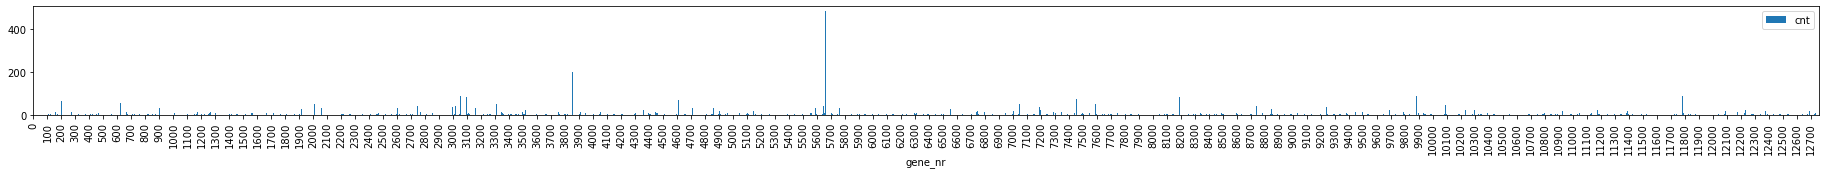

In [26]:
df_job.plot.bar(x='gene_nr', y='cnt', xticks=range(0,12755,100), figsize=(32.0,2.0))

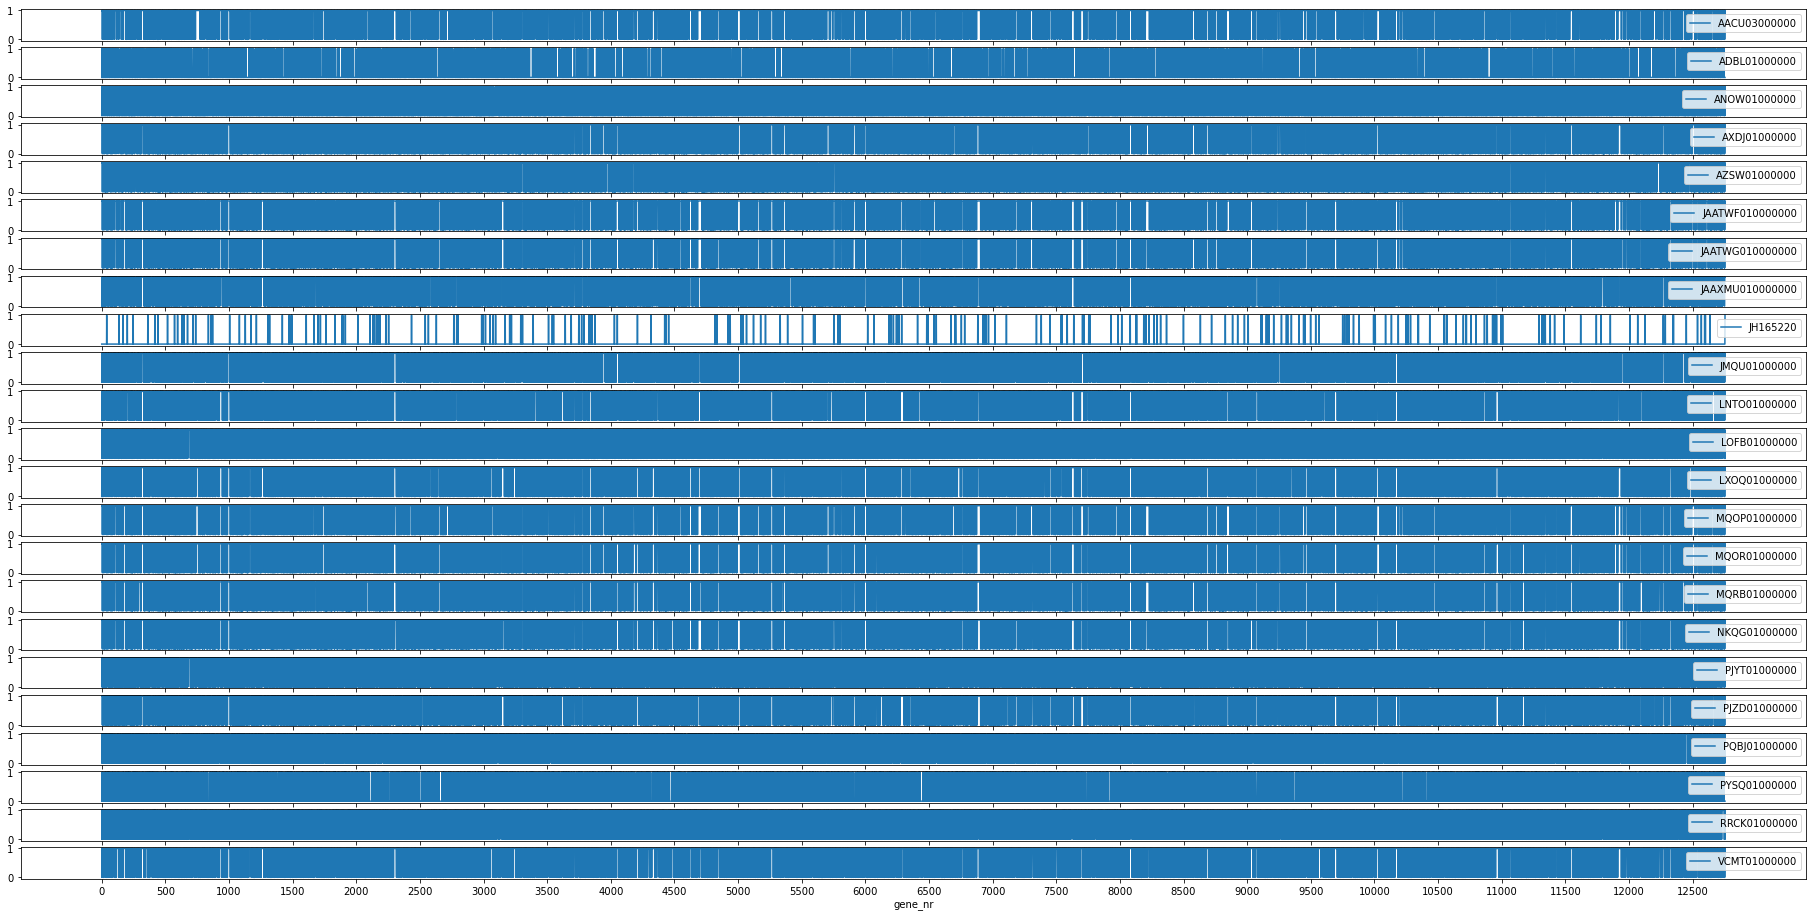

In [27]:
import matplotlib.pyplot as plt

## Create Genome Annotation BarCode Plots (Complete Genes)
SQL_Query = pd.read_sql_query('''select DISTINCT(job) as job from genes ORDER BY job ASC''', conn)
df = pd.DataFrame(SQL_Query, columns=['job'])
fig, axes = plt.subplots(nrows=len(df), ncols=1, sharex=True, figsize=(32.0,16.0))
for i, job in enumerate(df.job):
    m = re.search('.+_([A-Z]{2,6}[0-9]{6,11})_.+', job)
    short_job = m.group(1) if m else job
    SQL_Query = pd.read_sql_query('''select gene_nr, 1 as cnt from genes WHERE job = '%s' and is_complete = True GROUP BY gene_nr ORDER BY gene_nr ASC''' % job, conn)
    df_sql = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])
    df_job = pd.DataFrame.from_dict(dict([('gene_nr', range(0, num_genes)), ('cnt', np.zeros(num_genes, dtype=int))]))
    df_job.cnt[df_sql.gene_nr] = df_sql.cnt
    ## Bar Plot
    df_job.plot(x='gene_nr', y='cnt', xticks=range(0,12755,500), ax=axes[i])
    axes[i].legend().get_texts()[0].set_text(short_job)


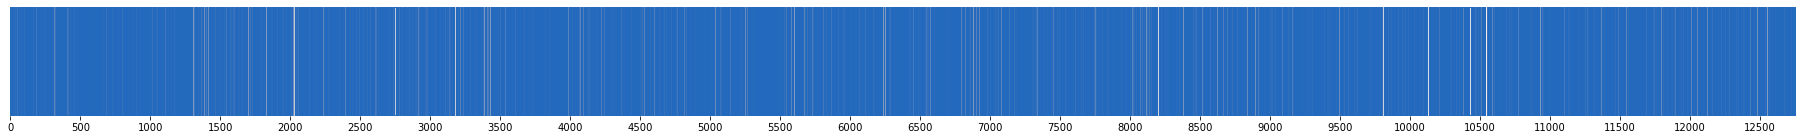

In [28]:
import seaborn as sns
## Job: job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae
SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE job = 'job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae' GROUP BY gene_nr ORDER BY gene_nr ASC''', conn)
df_sql = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])
df_job = pd.DataFrame.from_dict(dict([('cnt', np.zeros(num_genes, dtype=int))]))
df_job.cnt[df_sql.gene_nr] = df_sql.cnt
# Heatmap
plt.figure(figsize=(32.0,2.0))
ax = sns.heatmap(df_job.T, xticklabels=500, yticklabels=False, cmap='vlag', cbar=False)
# ax.legend(['job'], prop={'size': 48})

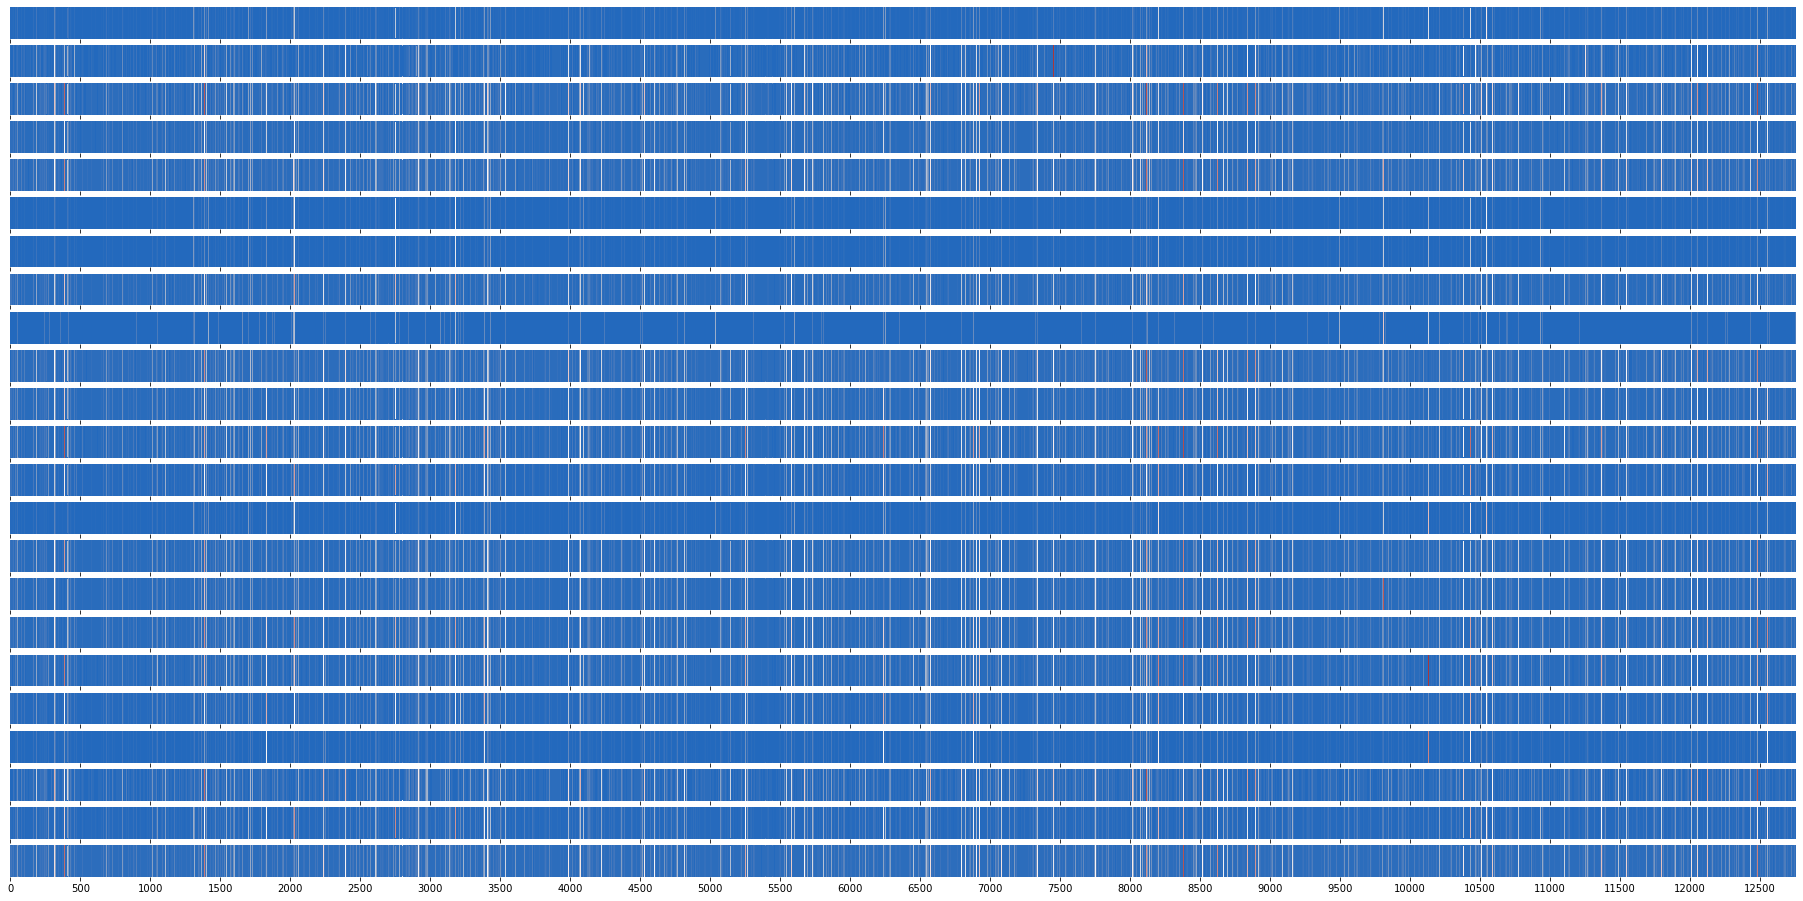

In [29]:
## Create Genome Annotation BarCode Plots (All Gene Predictions)
SQL_Query = pd.read_sql_query('''select DISTINCT(job) as job from genes ORDER BY job ASC''', conn)
df = pd.DataFrame(SQL_Query, columns=['job'])
fig, axes = plt.subplots(nrows=len(df), ncols=1, sharex=True, figsize=(32.0,16.0))
for i, job in enumerate(df.job):
    m = re.search('.+_([A-Z]{2,6}[0-9]{6,11})_.+', job)
    short_job = m.group(1) if m else job
    SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE job = '%s' GROUP BY gene_nr ORDER BY gene_nr ASC''' % job, conn)
    df_sql = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])
    df_job = pd.DataFrame.from_dict(dict([('cnt', np.zeros(num_genes, dtype=int))]))
    df_job.cnt[df_sql.gene_nr] = df_sql.cnt
    ## Heatmap
    ax = sns.heatmap(df_job.T, xticklabels=500, yticklabels=False, cmap='vlag', cbar=False, ax=axes[i])
    # axes[i].legend([short_job])